In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy as sp
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.interpolate import UnivariateSpline

In [3]:
plot_data = pd.read_csv("preprocessed_battery_data.csv")

<AxesSubplot:xlabel='SOC'>

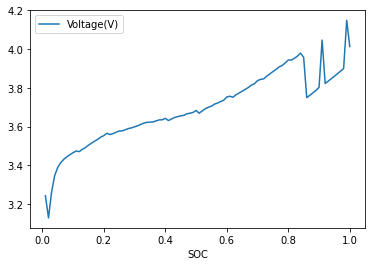

In [4]:
# SOC rounded to n decimals

plot_data.plot("SOC", "Voltage(V)")

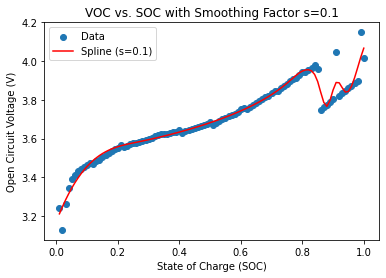

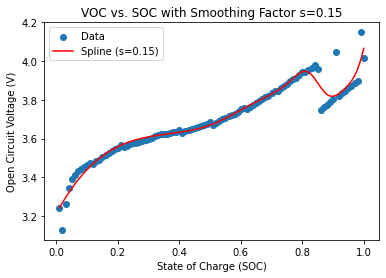

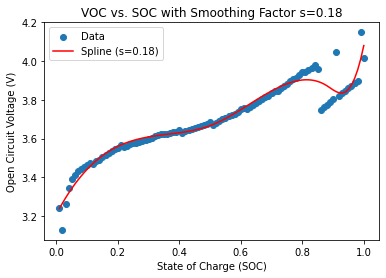

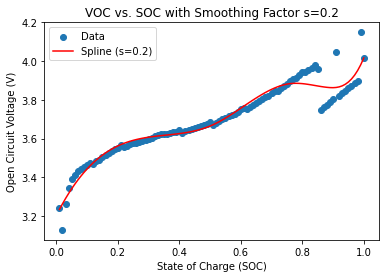

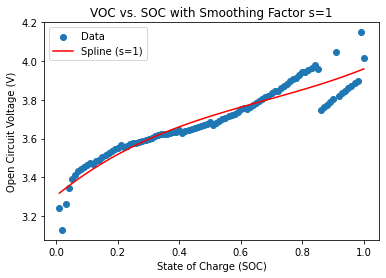

In [7]:
# Fit a spline to smooth the data
soc_values = plot_data["SOC"]
voltage_values = plot_data["Voltage(V)"]
spline = UnivariateSpline(soc_values, voltage_values)

# # Evaluate the spline
# voc_outputs_spline = spline(soc_inputs)


smoothing_factors = [0.1, 0.15, 0.18, 0.2, 1]

for s_factor in smoothing_factors:
    spline = UnivariateSpline(soc_values, voltage_values, s = s_factor)
    voc_outputs_spline = spline(soc_values)
    plt.figure()
    plt.scatter(plot_data['SOC'], plot_data['Voltage(V)'], label='Data')
    plt.plot(soc_values, voc_outputs_spline, label=f'Spline (s={s_factor})', color = "red")
    plt.xlabel('State of Charge (SOC)')
    plt.ylabel('Open Circuit Voltage (V)')
    plt.title(f'VOC vs. SOC with Smoothing Factor s={s_factor}')
    plt.legend()
    plt.show()

In [8]:
# The functions finds the voltage at a given soc for a function with corresponding smoothness_factor

def get_voc_from_soc(soc, smoothness_factor = 0.15, max_voc = 4.2):
    spline_model = UnivariateSpline(soc_values, voltage_values, s = smoothness_factor)
    
    # Aligns height of the graph with different max_voc 
    # ** There might be a better way to do this
    vertical_shift = max_voc / 4.2
    return vertical_shift * float(spline_model(soc))

In [10]:
# Example (soc = 0.25, smoothness_factor = 0.15 max_voc = 3.6)

get_voc_from_soc(0.25, max_voc = 3.6)

3.0771190718566293